In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Introduction to Pandas

**pandas** is a Python package providing fast, flexible, and expressive data structures designed to make working with “relational” or “labeled” data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming **the most powerful and flexible open source data analysis / manipulation tool available in any language**. It is already well on its way toward this goal.

pandas is well suited for many different kinds of data:
* Tabular data with heterogeneously-typed columns, as in an SQL table or Excel spreadsheet
* Ordered and unordered (not necessarily fixed-frequency) time series data.
* Arbitrary matrix data (homogeneously typed or heterogeneous) with row and column labels
* Any other form of observational / statistical data sets. The data actually need not be labeled at all to be placed into a pandas data structure

The two primary data structures of pandas - *Series* (1-dimensional) and *DataFrame* (2-dimensional), handle the vast majority of typical use cases in finance, statistics, social science, and many areas of engineering. For R users, DataFrame provides everything that R’s data.frame provides and much more. pandas is built on top of NumPy and is intended to integrate well within a scientific computing environment with many other 3rd party libraries.

Here are just a few of the things that pandas does well:
* Easy handling of missing data (represented as NaN) in floating point as well as non-floating point data
* Size mutability: columns can be inserted and deleted from DataFrame and higher dimensional objects
* Powerful, flexible group by functionality to perform split-apply-combine operations on data sets, for both aggregating and transforming data
* Intelligent label-based slicing, fancy indexing, and subsetting of large data sets
* Intuitive merging and joining data sets
* Flexible reshaping and pivoting of data sets
* Robust IO tools for loading data from flat files (CSV and delimited), Excel files, databases, and saving / loading data from the ultrafast HDF5 format
* Time series-specific functionality: date range generation and frequency conversion, moving window statistics, moving window linear regressions, date shifting and lagging, etc.

Many of these principles are here to address the shortcomings frequently experienced using other languages / scientific research environments. For data scientists, working with data is typically divided into multiple stages: munging and cleaning data, analyzing / modeling it, then organizing the results of the analysis into a form suitable for plotting or tabular display. pandas is the ideal tool for all of these tasks.

Some other notes
* **pandas** is fast. Many of the low-level algorithmic bits have been extensively tweaked in Cython code. However, as with anything else generalization usually sacrifices performance. So if you focus on one feature for your application you may be able to create a faster specialized tool.
* pandas is a dependency of statsmodels, making it an important part of the statistical computing ecosystem in Python.
* pandas has been used extensively in production in financial applications.

<br>

## Representation

All data is loaded directly into the RAM and is optimised to use memory efficiently. The data in memory can be thought of as below:

| column 1 | column 2 | column 3 |
| -------- | -------- | -------- |
| Alan | Robinson | Male |
| Kevin | O'Brien | Male |
| Diane | Cooper | Female |
| Patricia | O'Connor | Female |


The main data structure in **pandas** is **DataFrame** which manages data in the above format and is accessible for computation as a python **dictionary**. Lets create the above information as a pandas dataframe.

In [ ]:
Exercise : Add in more cases, and unpdate the code on an ongoing basis

In [3]:
# Create a python dictionary

data = {
    "column1": ["Alan", "Kevin", "Diane","Patricia"],
    "column2": ["Robinson", "O'Brien","Cooper","O'Connor"],
    "column3": ["Male", "Male", "Female","Female"],
    "some_random_numbers": [4200, 2750, 3425,3820]
}

data

{'column1': ['Alan', 'Kevin', 'Diane', 'Patricia'],
 'column2': ['Robinson', "O'Brien", 'Cooper', "O'Connor"],
 'column3': ['Male', 'Male', 'Female', 'Female'],
 'some_random_numbers': [4200, 2750, 3425, 3820]}

In [4]:

# data = {
#    "column1": ["Alan", "Kevin", "Diane","Patricia","Paul"],
#    "column2": ["Robinson", "O'Brien","Cooper","O'Connor","Hayes"],
#    "column3": ["Male", "Male", "Female","Female","Male"],
#    "some_random_numbers": [4200, 2750, 3425,3820,4560]
#}

# Create the DataFrame
df = pd.DataFrame(data)
df

,column1,column2,column3,some_random_numbers
0,Alan,Robinson,Male,4200
1,Kevin,O'Brien,Male,2750
2,Diane,Cooper,Female,3425
3,Patricia,O'Connor,Female,3820


An `index` column is added automatically by pandas. This is to keep track of rows and for fast manipulation of data by easy slicing. Individual rows can be accessed by the index.

In [14]:
df.loc[:4]

,column1,column2,column3,some_random_numbers
0,Alan,Robinson,Male,4200
1,Kevin,O'Brien,Male,2750
2,Diane,Cooper,Female,3425
3,Patricia,O'Connor,Female,3820


In [15]:
df["column1"]

0        Alan
1       Kevin
2       Diane
3    Patricia
Name: column1, dtype: object

In [16]:
df["column1"].values

array(['Alan', 'Kevin', 'Diane', 'Patricia'], dtype=object)

In [17]:
df["column1"].tolist()

['Alan', 'Kevin', 'Diane', 'Patricia']

**NOTE:** Data in a pandas DataFrame is linked as a collection of columns rather than a collection of rows. Thus it is very
fast to access and manipulate data in columns rather than rows. It is important to use appropriate data modelling
techniques to convert available data into a more accessible format

<br>

## Inspecting DataFrames

Below are some useful DataFrame inspection functions

In [20]:
# Summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
column1                4 non-null object
column2                4 non-null object
column3                4 non-null object
some_random_numbers    4 non-null int64
dtypes: int64(1), object(3)
memory usage: 208.0+ bytes


In [27]:
# Get the list of columns
df.columns

Index(['column1', 'column2', 'column3', 'some_random_numbers'], dtype='object')

In [30]:
# Get the index
df.index

RangeIndex(start=0, stop=4, step=1)

In [34]:
# Sneak peek
df.head(2)

,column1,column2,column3,some_random_numbers
0,Alan,Robinson,Male,4200
1,Kevin,O'Brien,Male,2750


In [35]:
df.head(1)

,column1,column2,column3,some_random_numbers
0,Alan,Robinson,Male,4200


In [41]:
# Summary Statistics
df.describe()

,some_random_numbers
count,4.000000
mean,3548.750000
std,619.413365
min,2750.000000
25%,3256.250000
50%,3622.500000
75%,3915.000000
max,4200.000000


In [45]:
df.describe().loc["min"]

some_random_numbers    2750.0
Name: min, dtype: float64

In [47]:
# Number of rows in a DataFrame
len(df)

4

For looking up details about a DataFrame or a function use "dir" or "help"

In [49]:
# dir(df)

In [51]:
# help(df.loc)

<br>

## Manipulating Data

Adding and removing columns from a DataFrame can be done on the fly and makes data manipulation very easy

In [ ]:
df

In [ ]:
df["Location"] = ["Athlone", "Limerick", "Dublin","Mullingar"]
df

A subset of columns can be extracted from a DataFrame to remove extra columns

In [ ]:
name_df = df[["column1", "column2"]]
name_df

In [ ]:
# Rename columns
name_df = name_df.rename(
    columns={
        "column1": "First Name",
        "column2": "Last Name"
    }
)
name_df

In [ ]:
# Extract the 1st letter of first name
name_df["FN_1"] = name_df["First Name"].map(lambda x: x[0])
name_df

In [ ]:
# TODO: Extract the last 3 letters of Last Name in a new column "LN_3"
name_df["LN_3"] = name_df["Last Name"].map(lambda x: x[-3:])
name_df

<br>
## Load Data

Data can be loaded from external sources like CSV files, Excel and databases.

In [69]:
Weather = pd.read_csv("https://raw.githubusercontent.com/PyDataWorkshop/datasets/master/weather_2012.csv")
Weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
Date/Time             8784 non-null object
Temp (C)              8784 non-null float64
Dew Point Temp (C)    8784 non-null float64
Rel Hum (%)           8784 non-null int64
Wind Spd (km/h)       8784 non-null int64
Visibility (km)       8784 non-null float64
Stn Press (kPa)       8784 non-null float64
Weather               8784 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [75]:
Weather.head()

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [73]:
Weather["Weather"].unique()

array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog', 'Thunderstorms,Moderate Rain Showers,Fog',
       'Rain Showers,Fog', 'Rain Showers,Snow Showers', 'Snow Pellets',
       'Rain,Snow,Fog', 'Moderate Rain,Fog',
       'Freezing Rain,Ice Pellets,Fog', 'Drizzle,Ice Pellets,Fog',
       'Drizzle,Snow', 'Rain,Ice Pellets', 'Drizzle,Snow,Fog',
       

<br>

## Filtering data

In [76]:
Weather["Weather"].str.contains("Fog").mean()

0.04849726775956284

In [79]:
Weather["Weather"].str.contains("Rain").head(5)

0    False
1    False
2    False
3    False
4    False
Name: Weather, dtype: bool

In [67]:
Weather["Weather"][Weather["Weather"].str.contains("Rain")]

18                               Rain
19                               Rain
22                       Rain Showers
24                       Rain Showers
153                 Freezing Rain,Fog
154                     Freezing Rain
157                     Freezing Rain
221                         Rain,Snow
296                     Freezing Rain
297         Freezing Rain,Snow Grains
299                     Freezing Rain
404                     Freezing Rain
405                     Freezing Rain
406                     Freezing Rain
407                 Freezing Rain,Fog
542                              Rain
543                              Rain
545                              Rain
546                          Rain,Fog
547                          Rain,Fog
552                              Rain
554                              Rain
555                              Rain
566                              Rain
631                     Freezing Rain
632                     Freezing Rain
633         

In [80]:
Weather["Weather"][Weather["Weather"].str.contains("Rain")].head(1)

18    Rain
Name: Weather, dtype: object

In [82]:
# Find only "Rain" weather reports
Weather["Weather"][Weather["Weather"].str.contains("Rain")].unique()

array(['Rain', 'Rain Showers', 'Freezing Rain,Fog', 'Freezing Rain',
       'Rain,Snow', 'Freezing Rain,Snow Grains', 'Rain,Fog',
       'Freezing Rain,Haze', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Rain,Snow,Fog', 'Moderate Rain,Fog',
       'Freezing Rain,Ice Pellets,Fog', 'Rain,Ice Pellets',
       'Rain,Snow Grains', 'Rain,Snow,Ice Pellets'], dtype=object)

In [84]:
# Find rows that has weather value as "Fog"
Weather[Weather["Weather"] == "Fog"].head(10)

,Date/Time,Temp (C),Dew Point Temp (C),Rel Hum (%),Wind Spd (km/h),Visibility (km),Stn Press (kPa),Weather
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
7,2012-01-01 07:00:00,-1.4,-3.6,85,7,8.0,101.26,Fog
8,2012-01-01 08:00:00,-1.4,-3.6,85,9,8.0,101.23,Fog
9,2012-01-01 09:00:00,-1.3,-3.1,88,15,4.0,101.20,Fog
10,2012-01-01 10:00:00,-1.0,-2.3,91,9,1.2,101.15,Fog
11,2012-01-01 11:00:00,-0.5,-2.1,89,7,4.0,100.98,Fog


In [88]:
# Find rows where temperature is more than 10 deg C
temp = Weather[(Weather["Temp (C)"] > 10.0) & (Weather["Weather"].isin(["Mainly Clear","Cloudy", "Clear"]))]

In [92]:
temp[["Weather"]].shape

(2716, 1)

In [94]:
# Group by on "Weather" column and count the number of records for each category
weather_grpby = Weather.groupby("Weather")["Dew Point Temp (C)"].mean()
weather_grpby

Weather
Clear                                       0.089367
Cloudy                                      2.375810
Drizzle                                     5.504878
Drizzle,Fog                                 7.033750
Drizzle,Ice Pellets,Fog                    -0.700000
Drizzle,Snow                                0.150000
Drizzle,Snow,Fog                            0.120000
Fog                                         3.159333
Freezing Drizzle                           -8.000000
Freezing Drizzle,Fog                       -4.183333
Freezing Drizzle,Haze                      -8.000000
Freezing Drizzle,Snow                      -7.072727
Freezing Fog                               -9.250000
Freezing Rain                              -6.078571
Freezing Rain,Fog                          -3.750000
Freezing Rain,Haze                         -7.450000
Freezing Rain,Ice Pellets,Fog              -3.700000
Freezing Rain,Snow Grains                  -7.300000
Haze                                  

In [95]:
# Group by on "Weather" column and count the number of records for each category
weather_grpby = Weather.groupby("Weather", as_index=False)["Dew Point Temp (C)"].count()
weather_grpby

,Weather,Dew Point Temp (C)
0,Clear,1326
1,Cloudy,1728
2,Drizzle,41
3,"Drizzle,Fog",80
4,"Drizzle,Ice Pellets,Fog",1
5,"Drizzle,Snow",2
6,"Drizzle,Snow,Fog",15
7,Fog,150
8,Freezing Drizzle,7
9,"Freezing Drizzle,Fog",6


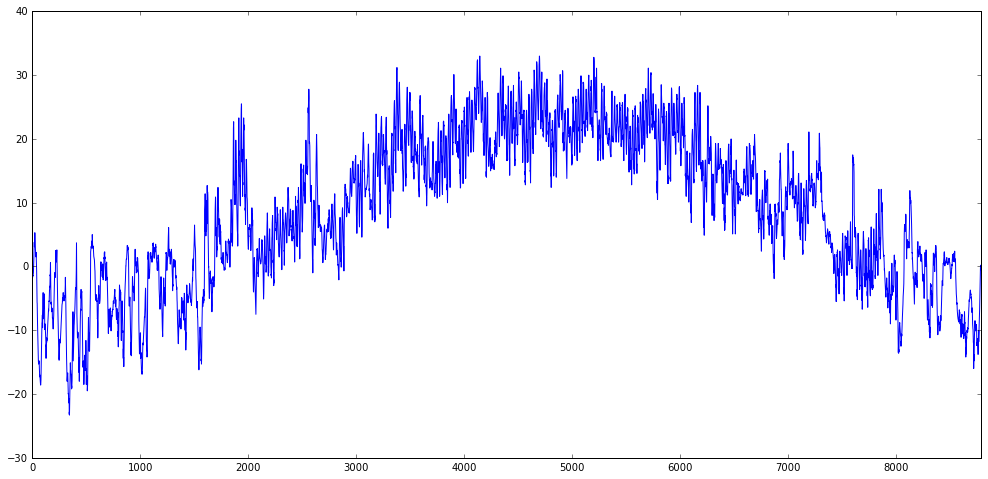

In [55]:
# Plot a line graph for "Temp (C)" field

# Plot function by default creates a "line" graph.
# The figure size is set for (width, height) in inches
Weather["Temp (C)"].plot(figsize=(17, 8))

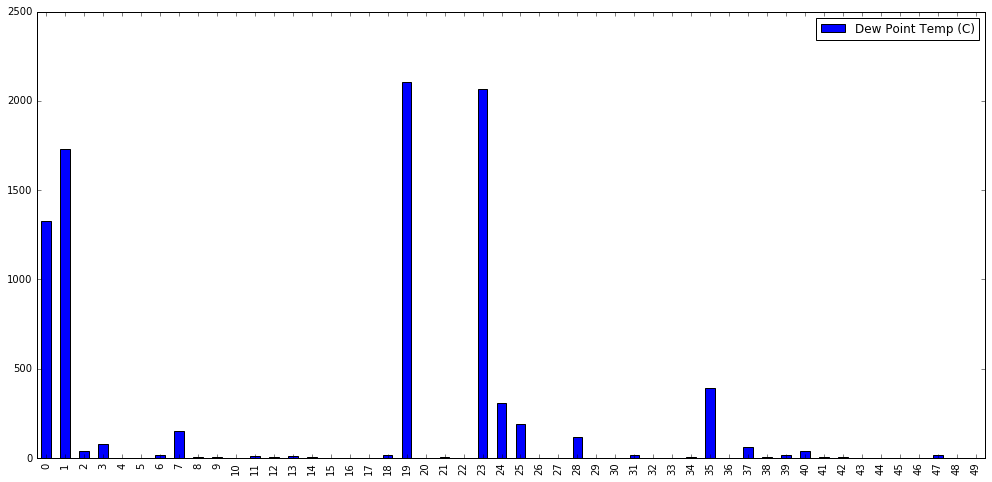

In [96]:
# Use the groupby result from earlier to find the weather with highest number of records
weather_grpby.plot(kind="bar", figsize=(17, 8))